In [1]:
from pid import PID
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

### Simulate vehicle dynamics

In [3]:
c = 1 #electro-mechanical constant
m = 1 #vehicle mass
gamma = 0.1 #air-drag coefficient
v_ref = 80
iterations = 500
umax = 50
dt = 0.01

In [4]:
def simulate_vehicle(prev_velocity, control, dt):
    acc = (c/m)*control - gamma*prev_velocity
    return prev_velocity + acc*dt

### Bang-Bang control

In [5]:
iters, velocity = 0, 0.0
vehicle_velocity = []
control_list = []
while iters < iterations:
    vehicle_velocity.append(velocity)
    error = v_ref - velocity
    if error > 0:
        control = umax
    else:
        control = -umax
    control_list.append(control)
    velocity = simulate_vehicle(velocity, control, dt)
    iters += 1

<IPython.core.display.Javascript object>


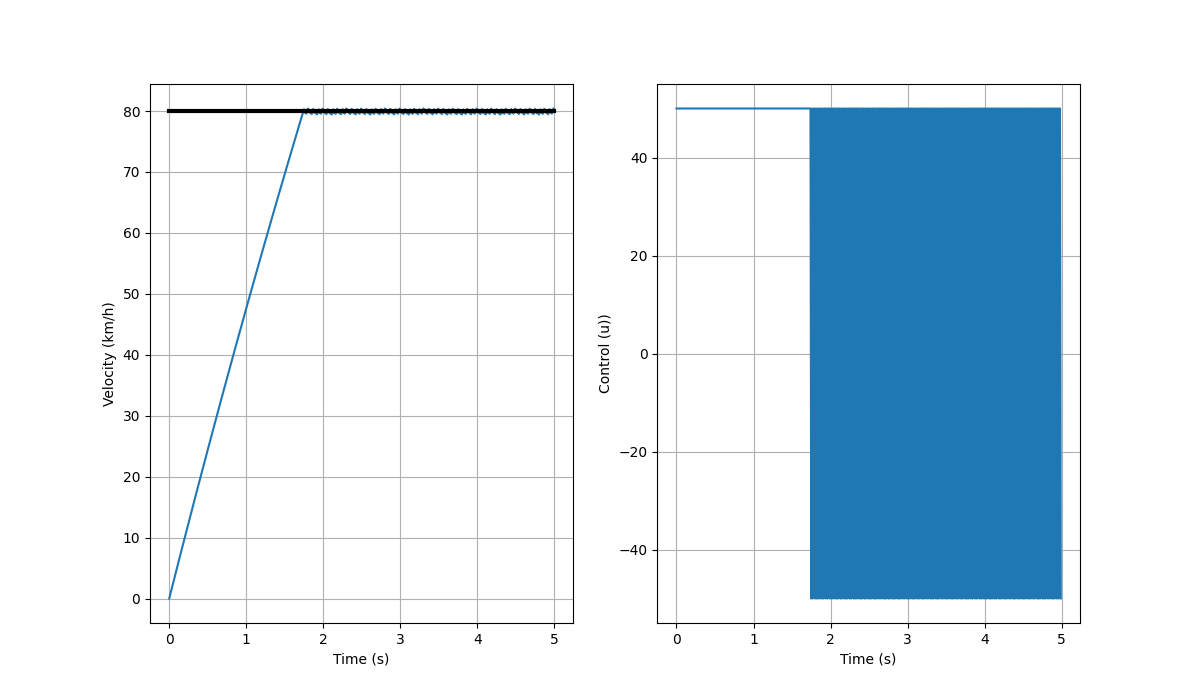

In [6]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12, 7)
axes[0].plot(np.arange(iterations)*dt,vehicle_velocity)
axes[0].plot(np.arange(iterations)*dt, np.ones(iterations)*v_ref, 'k-', linewidth=3)
axes[0].grid()
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Velocity (km/h)')
axes[1].plot(np.arange(iterations)*dt,control_list)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Control (u))')
axes[1].grid()

### P-controller

In [7]:
kp = 1
iters, velocity = 0, 0.0
vehicle_velocity = []
control_list = []
while iters < iterations:
    vehicle_velocity.append(velocity)
    error = v_ref - velocity
    control = kp * error
    control_list.append(control)
    velocity = simulate_vehicle(velocity, control, dt)
    iters += 1


<IPython.core.display.Javascript object>


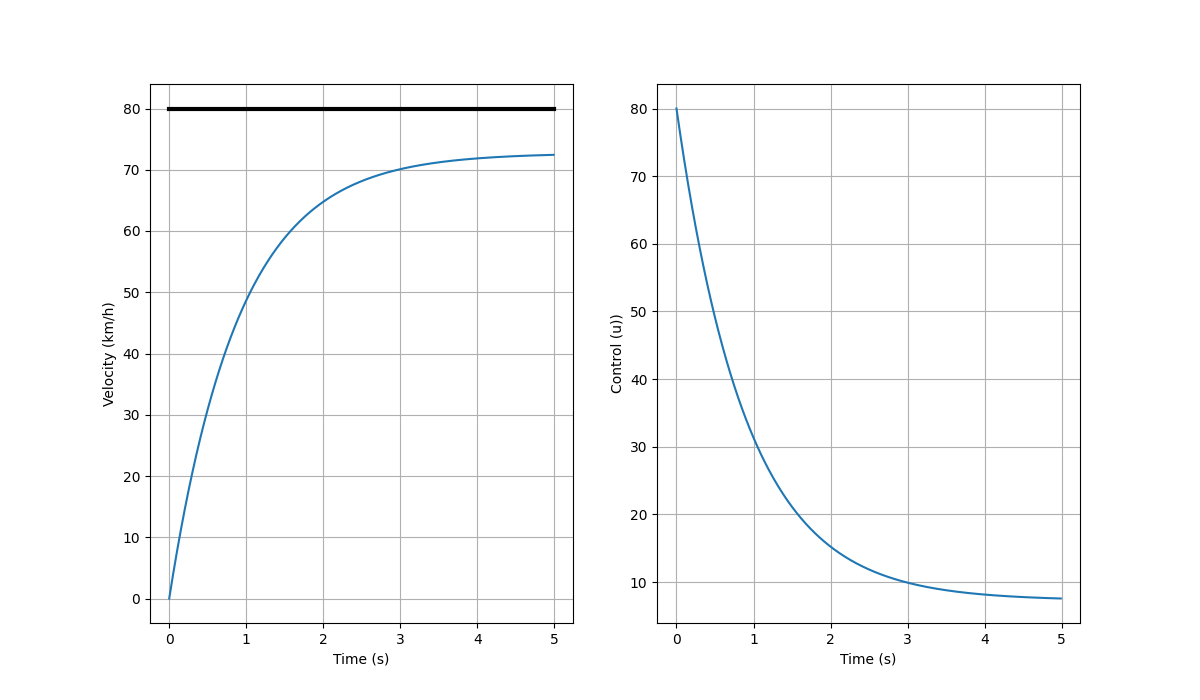

In [8]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12, 7)
axes[0].plot(np.arange(iterations)*dt,vehicle_velocity)
axes[0].plot(np.arange(iterations)*dt, np.ones(iterations)*v_ref, 'k-', linewidth=3)
axes[0].grid()
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Velocity (km/h)')
axes[1].plot(np.arange(iterations)*dt,control_list)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Control (u))')
axes[1].grid()

### PI controller

In [14]:
P, I, D = 1.0, 1.0, 0.0
pid = PID(P, I, D, 0.01)
pid.SetPoint = v_ref
iterations = 1000
velocity = 0.0
vehicle_velocity, control_list = [], []

for i in range(iterations):
    vehicle_velocity.append(velocity)
    pid.update(velocity)
    control = np.clip(pid.output, -umax, umax)
    control_list.append(control)
    velocity = simulate_vehicle(velocity, control, dt)


<IPython.core.display.Javascript object>


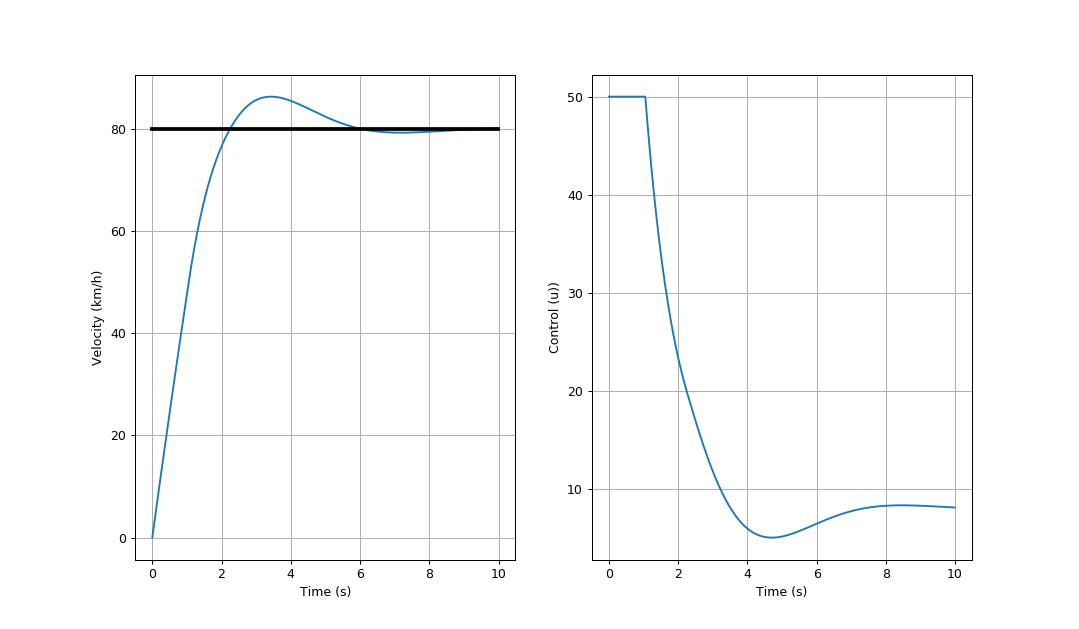

In [15]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(12, 7)
axes[0].plot(np.arange(iterations)*dt,vehicle_velocity)
axes[0].plot(np.arange(iterations)*dt, np.ones(iterations)*v_ref, 'k-', linewidth=3)
axes[0].grid()
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Velocity (km/h)')
axes[1].plot(np.arange(iterations)*dt,control_list)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Control (u))')
axes[1].grid()